Make a polar plot of X-ray polarization degree and angle.
Reads in source spectra, assumed to have keywords for response and background files.
Fits spectropolarimetric model.
Makes contour plot of polarization degree and angle.
Makes polar plots of polarizaiton degree and angle using matplotlib.

P. Kaaret 1/4/2025

In [1]:
import xspec as xs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# energy range for fitting
elow, ehigh = 2.0, 8.0
rebin = [4.0, 10] # set how Xspec rebins I spectrum

In [3]:
# base of file names for source and background spectra
specbase = ['det1_filt_src_', 'det2_filt_src_', 'det3_filt_src_']
specext = ['I.pha', 'U.pha', 'Q.pha'] # for Xselect spectra
# load the spectra into different data groups
ndu = len(specbase) # number of DUs used
specfile = '' # string for loading spectrum files
xs.AllData.clear() # removes all existing spectrum objects
for i in range(ndu) : # add to string for each DPU
  specfile += str(i+1)+':'+str(i*3+1)+' '+specbase[i]+specext[0]+' '+ \
              str(i+1)+':'+str(i*3+2)+' '+specbase[i]+specext[1]+' ' + \
              str(i+1)+':'+str(i*3+3)+' '+specbase[i]+specext[2]+' '
print(specfile)
%cd data
xs.AllData(specfile) # actually load the spectra
# display information for all loaded spectra
xs.AllData.show()

1:1 det1_filt_src_I.pha 1:2 det1_filt_src_U.pha 1:3 det1_filt_src_Q.pha 2:4 det2_filt_src_I.pha 2:5 det2_filt_src_U.pha 2:6 det2_filt_src_Q.pha 3:7 det3_filt_src_I.pha 3:8 det3_filt_src_U.pha 3:9 det3_filt_src_Q.pha 
/Users/karnaud/GitHub/PyXspec-Jupyter-notebooks/data
Number of spectra read .....Number of spectra read .....Number of spectra read .....Number of spectra read .....Number of spectra read ..... 9
9 spectra  in use
 
Spectral Data File: det1_filt_src_I.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.316e-01 +/- 2.980e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 8.253e+04 sec
  Filtering Keys: 
    Stokes: 0
 Using fit statistic: chi
 Using Response (RMF) File            ixpe_d1_20170101_alpha075_02.rmf for Source 1
 Using Auxiliary Response (ARF) File  det1_filt_src.arf

Spectral Data File: det1_filt_src_U.pha  Spectrum 2
Net count rate (cts/s) for Spectrum:2  -1.554e-

In [4]:
xs.Xset.abund = 'wilm' # set abundance to Wilms
xs.Xset.xsect = 'vern' # use Vern cross sections
xs.Fit.statMethod = 'chi' # use chi-squared for fitting
#xs.Fit.statMethod = 'cstat' # use Cash statistic for fitting
xs.Fit.statTest = 'chi'  # use chi-squared to check goodness of fit
xs.Fit.method = 'leven 10 0.01'  # fit method leven 10 0.01

et1_filt_src_U.pha
Net count rate (cts/s) for Spectrum:2  -1.554e-02 +/- 4.204e-03
 Assigned to Data Group 1 and Plot Group 2
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 8.253e+04 sec
  Filtering Keys: 
    Stokes: 2
 Using fit statistic: chi
 Using Response (RMF) File            ixpe_d1_20170101_alpha075_02.rmf for Source 1
 Using Auxiliary Response (ARF) File  det1_filt_src.mrf

Spectrum 3  Spectral Data File: det1_filt_src_Q.pha
Net count rate (cts/s) for Spectrum:3  -1.778e-02 +/- 4.203e-03
 Assigned to Data Group 1 and Plot Group 3
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 8.253e+04 sec
  Filtering Keys: 
    Stokes: 1
 Using fit statistic: chi
 Using Response (RMF) File            ixpe_d1_20170101_alpha075_02.rmf for Source 1
 Using Auxiliary Response (ARF) File  det1_filt_src.mrf

Spectrum 4  Spectral Data File: det2_filt_src_I.pha
Net count rate (cts/s) for Spectrum:4  6.86

In [5]:
# set energy range to be used in fitting
xs.AllData.ignore('0.0-'+str(elow))
xs.AllData.ignore(str(ehigh)+'-**')
print('Fitting spectra in '+str(elow)+' to '+str(ehigh)+' keV band')

Fitting spectra in 2.0 to 8.0 keV band    50 channels (1-50) ignored in spectrum #     1
    50 channels (1-50) ignored in spectrum #     2
    50 channels (1-50) ignored in spectrum #     3
    50 channels (1-50) ignored in spectrum #     4
    50 channels (1-50) ignored in spectrum #     5
    50 channels (1-50) ignored in spectrum #     6
    50 channels (1-50) ignored in spectrum #     7
    50 channels (1-50) ignored in spectrum #     8
    50 channels (1-50) ignored in spectrum #     9


   176 channels (200-375) ignored in spectrum #     1
   176 channels (200-375) ignored in spectrum #     2
   176 channels (200-375) ignored in spectrum #     3
   176 channels (200-375) ignored in spectrum #     4
   176 channels (200-375) ignored in spectrum #     5
   176 channels (200-375) ignored in spectrum #     6
   176 channels (200-375) ignored in spectrum #     7
   176 channels (200-375) ignored in spectrum #     8
   176 channels (200-375) ignored in spectrum #     9



In [6]:
# set up model
# use log-parabola model following Liodakis et al. 2022
xs.AllModels += ('constant*TBabs(polconst*logpar)', 'src', 1)
m = xs.AllModels(1, 'src') # pointer to astrophysical source model
# fix absorption
m.TBabs.nH = '0.0169 -1' # Galactic value
m.logpar.pivotE = '5.0 -1' # following Liodakis

for i in range(ndu) : # add to string for each DPU
  m = xs.AllModels(i+1, 'src') # pointer to spectral model
  if i == 0 :
    m.constant.factor = '1.0 -1' # fix constant for first DU to 1
  else :
    # constants are linked if we don't do anything to avoid that
    m.constant.factor = '1.0 0.01'
  # background model


Model src:constant<1>*TBabs<2>(polconst<3>*logpar<4>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
                           Data group: 1
   1    1   constant   factor              1.00000      +/-  0.0          
   2    2   TBabs      nH         10^22    1.00000      +/-  0.0          
   3    3   polconst   A                   1.00000      +/-  0.0          
   4    3   polconst   psi        deg      45.0000      +/-  0.0          
   5    4   logpar     alpha               1.50000      +/-  0.0          
   6    4   logpar     beta                0.200000     +/-  0.0          
   7    4   logpar     pivotE     (scale)  1.00000      
   8    4   logpar     norm                1.00000      +/-  0.0          
                           Data group: 2
   9    1   constant   factor              1.00000      = src:p1
  10    2   TBabs      nH         10^22    1.00000      = src:p2
  11    3   polconst   A                   1.00000      = src:p3


In [7]:
# try fitting
xs.Fit.nIterations = 100 # use lots of iterations
xs.Fit.query = 'yes'
# fit the spectrum  
xs.Fit.perform()

                                   Parameters
Chi-Squared  |beta|/N    Lvl       src:3:A     src:4:psi   src:5:alpha    src:6:beta    src:8:norm  src:9:factor src:17:factor
3240.86      741.232      -3      0.446875       46.7233       1.74991      0.477078    0.00467697       1.07402      0.944325
1981.8       53241.1      -4      0.191623       50.6317       1.80788      0.627527    0.00464375       1.06963      0.942376
1670.56      9129.5       -5     0.0677987       61.0133       1.80853      0.627041    0.00464456       1.06874      0.941369
1613.99      1247.33      -6     0.0199922       78.9362       1.80678      0.622367    0.00464684       1.06825      0.940850
1606.45      27.5023      -7     0.0271266       86.5553       1.80607      0.620396    0.00464760       1.06812      0.940662
1599.82      111.843      -8     0.0485306       89.0292       1.80598      0.620210    0.00464777       1.06808      0.940638
1598.49      58.1519      -9     0.0548137       89.6794       1.

In [8]:
if False : # change to true to plot the spectrum
  # plot the spectrum
  xs.Plot.device = '/xs' # '/cps' # 
  xs.Plot.xAxis = 'keV'
  xs.Plot.xLog = True
  xs.Plot.yLog = True
  if rebin[0] > 0 : xs.Plot.setRebin(minSig=rebin[0], maxBins=rebin[1])
  xs.Plot.splashPage = False
  xs.Plot.add = True # display individual additive components
  xs.Plot.addCommand('time off') # no date/time on plot 
  xs.Plot.addCommand('label top') # no title at top of plot
  xs.Plot.addCommand('lwidth 2') # use wider lines
  xs.Plot("ldata delchi")

In [9]:
# find errors on polarization parameters
stat, dof = xs.Fit.statistic, xs.Fit.statistic
if stat/dof >= 2.0 : print('Chisq/DoF too large to find errors, ', stat/dof)
else : 
  # errors are 99% confidence for 2 parameter, can use to set contour plot range below
  xs.Fit.error('9.21 src:3 src:4')

9      0.940606
1598.02      12.6733     -11     0.0559569       89.9491       1.80592      0.620137    0.00464808       1.06798      0.940604
1597.97      11.6671     -12     0.0560317       89.9816       1.80591      0.620133    0.00464808       1.06798      0.940603
1597.94      11.7906     -13     0.0560712       89.9984       1.80591      0.620130    0.00464809       1.06798      0.940603
1597.94      11.7017     -14     0.0560916       89.9994       1.80591      0.620129    0.00464809       1.06798      0.940603
 Variances and Principal Axes
             src:3    src:4    src:5    src:6    src:8    src:9   src:17  
 1.9955E-10| -0.0000  -0.0000  -0.0026   0.0008  -1.0000  -0.0015  -0.0015  
 2.8314E-05| -0.0003  -0.0000   0.0266  -0.0105   0.0001   0.6327  -0.7738  
 8.2383E-05| -0.0004  -0.0000   0.0560  -0.0221  -0.0023   0.7717   0.6332  
 1.0972E-04|  0.0225   0.0000  -0.9326   0.3540   0.0026   

***Warning: Parameter pegged at hard limit: 90


In [10]:
# plot the polarization degree and angle in a polar plot
# first make a contour plot in Xspec
# steppar over polarization degree and angle
# adjust polarization degree (src:3) polarization angle (src:4) to fit contours on plot
# angle is usually -90 to 90 or 0 to 180
# temporarily set chatter to zero to avoid overrunning output buffer in the steppar
xs.Xset.chatter = 0
xs.Fit.steppar('src:3 0.0 0.14 40 src:4 -90 90 40')
xs.Xset.chatter = 10
xs.Plot.xLog = False
xs.Plot.yLog = False
xs.Plot.addCommand('image off')
xs.Plot.addCommand('label x Polarization degree')
xs.Plot.addCommand('label y Polarization angle (deg)')
xs.Plot.addCommand('label top') # no title at top of plot
xs.Plot.addCommand('label otop') # no title at top of plot
# confidence level of delta chi-squared with 2 degrees of freedom
# used in plot: 2.30 = 68.3% (1-sigma), 4.61 = 90%, 9.21 = 99%
# other levels of interest 6.18 = 95.45% (2-sigma), 11.83 = 99.73% (3-sigma)
xs.Plot('contour , , 3,  2.3, 4.61, 9.21')

0.0647   0.0160  
 1.6150E-04|  0.9997   0.0000   0.0211  -0.0079  -0.0001  -0.0010  -0.0003  
 7.1062E-03|  0.0001   0.0000  -0.3549  -0.9349   0.0002  -0.0009  -0.0002  
 1.6674E+02| -0.0000   1.0000   0.0000   0.0000   0.0000  -0.0000  -0.0000  
--------------------------------------------------------------------------------

  Covariance Matrix
        1           2           3           4           5           6           7   
   1.615e-04  -2.563e-03   8.580e-07  -1.026e-06  -5.344e-09  -2.997e-08  -2.701e-08
  -2.563e-03   1.667e+02   8.070e-10   2.154e-09   6.036e-13  -2.249e-10  -4.188e-10
   8.580e-07   8.070e-10   9.910e-04   2.322e-03  -7.089e-07  -4.360e-07   1.197e-06
  -1.026e-06   2.154e-09   2.322e-03   6.225e-03  -1.046e-06   6.590e-06   1.007e-06
  -5.344e-09   6.036e-13  -7.089e-07  -1.046e-06   1.559e-09  -1.248e-07  -1.177e-07
  -2.997e-08  -2.249e-10  -4.360e-07   6.590e-06  -1.248e-07   6.086e-05   2.650e-05
  -2.701e-08  -4.188e-10   1.197e-06   1.007e-06  -1.1

3.94833E-05  
                           Data group: 2
   9    1   constant   factor              1.06798      +/-  7.80100E-03  
  10    2   TBabs      nH         10^22    1.69000E-02  = src:p2
  11    3   polconst   A                   5.60916E-02  = src:p3
  12    3   polconst   psi        deg      89.9994      = src:p4
  13    4   logpar     alpha               1.80591      = src:p5
  14    4   logpar     beta                0.620129     = src:p6
  15    4   logpar     pivotE     (scale)  5.00000      = src:p7
  16    4   logpar     norm                4.64809E-03  = src:p8
                           Data group: 3
  17    1   constant   factor              0.940603     +/-  7.07190E-03  
  18    2   TBabs      nH         10^22    1.69000E-02  = src:p2
  19    3   polconst   A                   5.60916E-02  = src:p3
  20    3   polconst   psi        deg      89.9994      = src:p4
  21    4   logpar     alpha               1.80591      = src:p5
  22    4   logpar     beta            

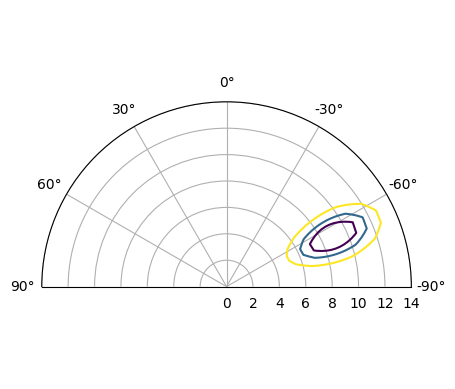

In [11]:
# return polarization degree in percent for plot labels
def polpercent(x, pos):
    return f'{100*x:.0f}'

# set up plotting in Python
plt.ion() # make plotting interactive
# contour plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.yaxis.set_major_formatter(ticker.FuncFormatter(polpercent))
px = np.array(xs.Plot.x(1, 1))
py = np.array(xs.Plot.y(1, 1))
pz = np.array(xs.Plot.z())
levels = xs.Plot.contourLevels() 
r, theta = np.meshgrid(px, (np.pi/180)*py)  
ax.contour(theta, r, pz, levels)
ax.set_xlim([-90*(np.pi/180), +90*(np.pi/180)])
ax.set_theta_zero_location("N")
plt.show()